# Nettoyage et Analyse exploratoire


Le but est de préparer notre base de données pour les différents modèles prédictifs que nous utiliserons, ainsi que de commencer l'analyse des variables jugées pertinentes pour ce projet.


## Traitement initial

### Chargement de la base de données

Nous allons commencer par charger les bibliothèques dont nous aurons besoin.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Les options suivantes permettent d'afficher toutes les lignes et colonnes voulues lorsqu'on appelle la fonction print
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

#Ces lignes évite l'apparition d'un avertissement dû à un changement de version
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

Les données sont fournies en 2 parties : l'une contenant des données récoltées en 2015 et l'autre en 2016. Nous allons concaténer les deux pour former la base de données initiale que nous allons progressivement nettoyer.

In [2]:
#On importe les jeux de données de 2015 et 2016
data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
data_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

#On les concaténe pour faire le jeu de données complet
data = pd.concat([data_2015, data_2016], axis = 0, sort = True).reset_index()

### Tri des variables

Jetons un oeil aux tailles et variables de ces deux jeux de données respectifs :

In [3]:
print(data_2015.shape)
print(data_2015.columns)
print(data_2016.shape)
print(data_2016.columns)

(3340, 47)
Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Defa

On peut d'ores et déjà commencer à enlever les variables qui n'auront aucune pertinence dans notre étude.

In [4]:
suppression = ['2010 Census Tracts', 'Address', 'City', 'City Council Districts', 'Comment', 'Comments',
       'ComplianceStatus', 'CouncilDistrictCode', 'DefaultData', 'Latitude', 'Location',
       'Longitude', 'Neighborhood', 'OSEBuildingID', 'Outlier', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'State', 'TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified', 'Zip Codes', 'ZipCode']
  
data.drop(columns = suppression, inplace = True)

data.head()

,index,BuildingType,DataYear,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity,GHGEmissionsIntensity(kgCO2e/ft2),LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,PropertyName,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt
0,0,NonResidential,2015,65.0,3686160.0,1080307.0,249.43,NaN,2.64,Hotel,88434.0,Hotel,1272388.0,12724.0,1.0,12.0,0.0,Hotel,88434,0,88434,MAYFLOWER PARK HOTEL,NaN,NaN,78.9,80.3,6981428.0,7097539.0,173.5,175.1,2023032.0,NaN,NaN,NaN,1927
1,1,NonResidential,2015,51.0,3905411.0,1144563.0,263.51,NaN,2.38,Hotel,83880.0,"Hotel, Parking, Restaurant",4448985.0,44490.0,1.0,11.0,0.0,Hotel,88502,15064,103566,PARAMOUNT HOTEL,Parking,15064.0,94.4,99.0,8354235.0,8765788.0,191.3,195.2,0.0,Restaurant,4622.0,NaN,1996
2,2,NonResidential,2015,18.0,49762435.0,14583930.0,2061.48,NaN,1.92,Hotel,757243.0,"Hotel, Parking, Swimming Pool",3709900.0,37099.0,1.0,41.0,0.0,Hotel,961990,0,961990,WESTIN HOTEL,Parking,100000.0,96.6,99.7,73130656.0,75506272.0,242.7,246.5,19660404.0,Swimming Pool,0.0,NaN,1969
3,3,NonResidential,2015,1.0,2769023.0,811521.0,1936.34,NaN,31.38,Hotel,61320.0,Hotel,2001894.0,20019.0,1.0,10.0,0.0,Hotel,61320,0,61320,HOTEL MAX,NaN,NaN,460.4,462.5,28229320.0,28363444.0,636.3,643.2,23458518.0,NaN,NaN,NaN,1926
4,4,NonResidential,2015,67.0,6066245.0,1777841.0,507.70,NaN,4.02,Hotel,123445.0,"Hotel, Parking, Swimming Pool",8763105.0,87631.0,1.0,18.0,0.0,Hotel,107430,12460,119890,WARWICK SEATTLE HOTEL,Parking,68009.0,120.1,122.1,14829099.0,15078243.0,228.8,227.1,0.0,Swimming Pool,0.0,NaN,1980


Pour les variables restantes il convient de savoir quelle proportion de données elles concernent :

In [5]:
remplissage = pd.DataFrame(index = ['Effectif_2015', 'Effectif_2016', 'Effectif_total', 
                                    'Pourcentage_2015', 'Pourcentage_2016', 'Pourcentage_total'], columns = data.columns)
remplissage.loc['Effectif_2015'] = data_2015.count(axis=0)
remplissage.loc['Pourcentage_2015'] = 100*data_2015.count(axis=0)/data_2015.shape[0]
remplissage.loc['Effectif_2016'] = data_2016.count(axis=0)
remplissage.loc['Pourcentage_2016'] = 100*data_2016.count(axis=0)/data_2016.shape[0]
remplissage.loc['Effectif_total'] = data.count(axis=0)
remplissage.loc['Pourcentage_total'] = 100*data.count(axis=0)/data.shape[0]

remplissage.head(6)

,index,BuildingType,DataYear,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity,GHGEmissionsIntensity(kgCO2e/ft2),LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,PropertyName,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt
Effectif_2015,NaN,3340,3340,2560,3330,3330,3330,NaN,3330,3204,3204,3213,3330,3330,3340,3332,3330,3340,3340,3340,3340,3340,1559,1559,3330,3330,3330,3330,3330,3330,3330,560,560,NaN,3340
Effectif_2016,NaN,3376,3376,2533,3367,3367,NaN,3367,NaN,3356,3356,3367,3367,3367,3368,3376,NaN,3376,3376,3376,3376,3376,1679,1679,3369,3370,3371,3370,3367,3367,3367,596,596,3367,3376
Effectif_total,6716,6716,6716,5093,6697,6697,3330,3367,3330,6560,6560,6580,6697,6697,6708,6708,3330,6716,6716,6716,6716,6716,3238,3238,6699,6700,6701,6700,6697,6697,6697,1156,1156,3367,6716
Pourcentage_2015,NaN,100,100,76.6467,99.7006,99.7006,99.7006,NaN,99.7006,95.9281,95.9281,96.1976,99.7006,99.7006,100,99.7605,99.7006,100,100,100,100,100,46.6766,46.6766,99.7006,99.7006,99.7006,99.7006,99.7006,99.7006,99.7006,16.7665,16.7665,NaN,100
Pourcentage_2016,NaN,100,100,75.0296,99.7334,99.7334,NaN,99.7334,NaN,99.4076,99.4076,99.7334,99.7334,99.7334,99.763,100,NaN,100,100,100,100,100,49.7334,49.7334,99.7927,99.8223,99.8519,99.8223,99.7334,99.7334,99.7334,17.654,17.654,99.7334,100
Pourcentage_total,100,100,100,75.8338,99.7171,99.7171,49.5831,50.134,49.5831,97.6772,97.6772,97.975,99.7171,99.7171,99.8809,99.8809,49.5831,100,100,100,100,100,48.2132,48.2132,99.7469,99.7618,99.7767,99.7618,99.7171,99.7171,99.7171,17.2126,17.2126,50.134,100


On remarque que certaines variables ont changé de nom d'une base de données à l'autre, il va falloir les fusionner manuellement. Vérifions d'abord si elles ont les mêmes plages de valeurs (au cas où il y aurait des unités différentes de l'une à l'autre).

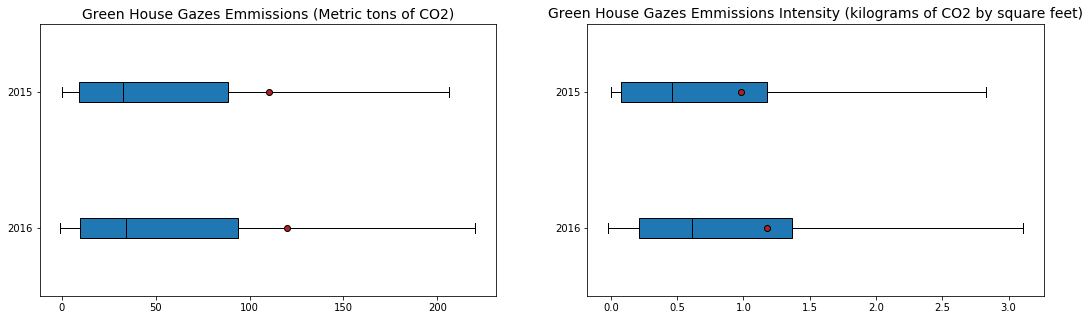

In [6]:
#Quelques propriétés graphiques pour rendre les boxplots plus lisibles
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

#On concatène manuellement les données à afficher, entre autres pour éviter les NaN
donnees1 = []
donnees1.append(data.dropna(axis='index', subset=['TotalGHGEmissions'])['TotalGHGEmissions'])
donnees1.append(data.dropna(axis='index', subset=['GHGEmissions(MetricTonsCO2e)'])['GHGEmissions(MetricTonsCO2e)'])
donnees2 = []
donnees2.append(data.dropna(axis='index', subset=['GHGEmissionsIntensity'])['GHGEmissionsIntensity'])
donnees2.append(data.dropna(axis='index', subset=['GHGEmissionsIntensity(kgCO2e/ft2)'])['GHGEmissionsIntensity(kgCO2e/ft2)'])

#On génère les deux figures avant de les afficher
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(121)
plt.boxplot(donnees1, labels=['2016', '2015'], showfliers=False, 
            medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax.set_title("Green House Gazes Emmissions (Metric tons of CO2)", fontsize=14)
ax = fig.add_subplot(122)
plt.boxplot(donnees2, labels=['2016', '2015'], showfliers=False, 
            medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax.set_title("Green House Gazes Emmissions Intensity (kilograms of CO2 by square feet)", fontsize=14)

plt.show()

Nous pouvons dès à présent fusionner ces variables, avant de défausser les anciennes colonnes.

In [7]:
#On fusionne les 2 colonnes d'émission de gaz à effet de serre
data['GHGEmissions(MetricTonsCO2e)'] = np.fmax(data['GHGEmissions(MetricTonsCO2e)'], data['TotalGHGEmissions'])
#Ainsi que les 2 colonnes d'intensité d'émission de ces gaz
data['GHGEmissionsIntensity(kgCO2e/ft2)'] = np.fmax(data['GHGEmissionsIntensity(kgCO2e/ft2)'], data['GHGEmissionsIntensity'])
#Puis on supprime les anciennes colonnes devenues obsolètes
data.drop(columns = ['TotalGHGEmissions', 'GHGEmissionsIntensity'], inplace = True)

### Gestion des doublons

Certaines entrées peuvent apparaître deux fois, puisque les données ont été prélevées sur 2 années différentes. Nous allons utiliser la variable "PropertyName" afin d'identifier ces doublons, puis conserver l'entrée la plus récente.

In [8]:
#On retient la taille initiale de la database pour savoir combien d'entrées ont été supprimées
taille_initiale = data.shape[0]
#On range les propriétés par Année, avant de supprimer les doublons
data = data.sort_values('DataYear').drop_duplicates('PropertyName', keep = "last").reset_index(drop = True)
#On affiche combien de doublons ont ainsi été supprimés
nbr_doublons = taille_initiale - data.shape[0]
print(nbr_doublons, "entrées ont été supprimées.")

189 entrées ont été supprimées.


On peut désormais se débarasser de la date d'obtention des données ainsi que du vieil index (devenu obsolète), avant de jeter un oeil à notre database.

In [9]:
#On supprime les colonnes "DataYear" et "index"
data.drop(columns = ['DataYear', 'index'], inplace = True)
#On affiche la database
data.head()

,BuildingType,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,PropertyName,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearBuilt
0,NonResidential,65.0,3686160.0,1080307.0,249.43,2.64,Hotel,88434.0,Hotel,1272388.0,12724.0,1.0,12.0,0.0,Hotel,88434,0,88434,MAYFLOWER PARK HOTEL,NaN,NaN,78.9,80.3,6981428.0,7097539.0,173.5,175.1,2023032.0,NaN,NaN,1927
1,Multifamily LR (1-4),47.0,1527492.0,447664.0,147.69,2.21,Senior Care Community,63998.0,"Parking, Senior Care Community",2580398.0,25804.0,1.0,4.0,0.0,Senior Care Community,63998,0,63998,FRED LIND MANOR,Parking,0.0,64.2,69.7,4107827.0,4458992.0,117.3,122.1,0.0,NaN,NaN,1988
2,Multifamily LR (1-4),85.0,398331.0,116739.0,15.24,0.56,NaN,NaN,NaN,234618.0,2346.0,1.0,3.0,0.0,Low-Rise Multifamily,24084,0,24084,ROXBOROUGH APTS,NaN,NaN,26.3,30.4,632932.0,732772.0,62.2,73.7,0.0,NaN,NaN,1920
3,Multifamily MR (5-9),99.0,3168818.0,928689.0,167.31,0.35,Multifamily Housing,186618.0,"Multifamily Housing, Other",2734346.0,27343.0,1.0,6.0,0.0,Mid-Rise Multifamily,282607,156997,439604,SUMMIT AT MADISON PARK CONDOMINIUM,Other,53952.0,24.5,25.9,5903033.0,6234057.0,53.3,55.8,0.0,NaN,NaN,2004
4,Multifamily MR (5-9),85.0,3530072.0,1034562.0,28.54,0.10,Multifamily Housing,115000.0,Multifamily Housing,73941.0,739.0,1.0,9.0,0.0,Mid-Rise Multifamily,127230,0,127230,LUXE AT MERIDIAN APTS,NaN,NaN,31.3,33.0,3603866.0,3794186.0,97.1,102.5,0.0,NaN,NaN,1970


## Types de bâtiments

### Format des variables

Il nous faudra considérer le type du bâtiment étudié car cela aura un lourd impact sur les consommations énergétiques de ce dernier et figure sur le permis d'exploitation. Pour cela nous allons lister les mots les plus présents dans les variables correspondantes pour voir lesquelles pourraient être exploitables.

In [10]:
from collections import Counter

#On utilise cette fonction pour lister les mots les plus fréquents dans nos variables
#Fonction issue d'un cours OpenClassroom
def most_common_words(labels):
    words = []
    for lab in labels:
        words += lab.split(" ")
    counter = Counter(words)
    for word in counter.most_common(100):
        print(word)

#Nous aurons besoin des effectifs des variables étudiées, qui a pu évoluer depuis l'utilisation de "remplissage"
effectif = data.count(axis=0)
        
#On affiche les effectifs des mots les plus fréquents dans nos variables de types, ainsi que le remplissage de chacune
print('BuildingType :')
most_common_words(data['BuildingType'].values)
print('Total : ', effectif['BuildingType'], ' sur ', data.shape[0], ' entrées.')

#Celle-ci n'est pas formatée comme un string, il faut donc passer par la fonction value_counts()
print('\n LargestPropertyUseType :')
print(data['LargestPropertyUseType'].value_counts())
print('Total : ', effectif['LargestPropertyUseType'], ' sur ', data.shape[0], ' entrées.')

#Celle-ci n'est pas formatée comme un string, il faut donc passer par la fonction value_counts()
print('\n SecondLargestPropertyUseType :')
print(data['SecondLargestPropertyUseType'].value_counts())
print('Total : ', effectif['SecondLargestPropertyUseType'], ' sur ', data.shape[0], ' entrées.')

#Celle-ci n'est pas formatée comme un string, il faut donc passer par la fonction value_counts()
print('\n ThirdLargestPropertyUseType :')
print(data['ThirdLargestPropertyUseType'].value_counts())
print('Total : ', effectif['ThirdLargestPropertyUseType'], ' sur ', data.shape[0], ' entrées.')

#Dernière variable de type
print('\n PrimaryPropertyType :')
most_common_words(data['PrimaryPropertyType'].values)
print('Total : ', effectif['PrimaryPropertyType'], ' sur ', data.shape[0], ' entrées.')

BuildingType :
('Multifamily', 3328)
('NonResidential', 2814)
('LR', 1992)
('(1-4)', 1992)
('MR', 1121)
('(5-9)', 1121)
('HR', 215)
('(10+)', 215)
('SPS-District', 197)
('K-12', 197)
('Nonresidential', 143)
('COS', 142)
('Campus', 45)
('WA', 1)
Total :  6527  sur  6527  entrées.

 LargestPropertyUseType :
Multifamily Housing                                     3202
Office                                                   936
Non-Refrigerated Warehouse                               359
K-12 School                                              275
Other                                                    200
Retail Store                                             193
Hotel                                                    140
Worship Facility                                         136
Distribution Center                                      100
Senior Care Community                                     86
Medical Office                                            82
Supermarket/Grocery St

### Suppression des bâtiments destinés à l'habitation

Le projet demande de se concentrer exclusivement sur les **bâtiments non destinés à l'habitation**. Pour cela, nous allons utiliser la variable *BuildingType* pour discriminer les bâtiments résidentiels de ceux conservés pour l'étude.

In [11]:
#On affiche les différentes valeurs possibles pour "BuildingType"
print(data['BuildingType'].unique())

['NonResidential' 'Multifamily LR (1-4)' 'Multifamily MR (5-9)'
 'Multifamily HR (10+)' 'SPS-District K-12' 'Nonresidential COS' 'Campus'
 'Nonresidential WA']


In [12]:
#On liste les types que l'on souhaite supprimer
supprimer = ['Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'Multifamily HR (10+)', 'SPS-District K-12', 'Campus']

#On supprime les entrées ayant chacune des valeurs qui ne nous intéressent pas
for s in supprimer:
    data.drop(index = data[data['BuildingType'] == s].index, inplace = True)

print(data['BuildingType'].unique())
print(data.shape)

['NonResidential' 'Nonresidential COS' 'Nonresidential WA']
(2957, 31)


### Tri des types de bâtiments restants

La variable *BuildingType* ne nous sera plus utile, mais on peut se servir de *PrimaryPropertyType* pour séparer davantage les bâtiments selon leur type. Pour cela nous allons associer aux mots-clés les plus importants un type de bâtiment.

In [13]:
#On affiche à nouveau les effectifs des différents mots présents (après suppression des bâtiments résidentiels)
print('PrimaryPropertyType :')
most_common_words(data['PrimaryPropertyType'].values)

PrimaryPropertyType :
('Office', 977)
('Small-', 557)
('and', 557)
('Mid-Sized', 557)
('Other', 471)
('Warehouse', 365)
('Large', 336)
('Store', 260)
('Mixed', 205)
('Use', 205)
('Property', 205)
('Retail', 184)
('Facility', 167)
('Non-Refrigerated', 155)
('Hotel', 144)
('Worship', 138)
('Distribution', 101)
('Medical', 81)
('K-12', 78)
('School', 78)
('Center', 55)
('Self-Storage', 54)
('Center\n', 46)
('Supermarket', 40)
('/', 40)
('Grocery', 40)
('Senior', 38)
('Care', 38)
('Community', 38)
('Supermarket/Grocery', 36)
('Residence', 36)
('Facility\n', 25)
('Refrigerated', 24)
('Hall', 21)
('Hospital', 20)
('University', 18)
('College/University', 16)
('Hall/Dormitory', 15)
('Restaurant', 12)
('Laboratory', 11)
('Restaurant\n', 10)
('Low-Rise', 3)
('Multifamily', 3)


In [14]:
#Dictionnaire des types en fonction des mots-clés
types = {
    'Hotel': 'Hôtel',
    'Residence': 'Hôtel',
    'Community': 'Hôtel',
    'Office': 'Bureaux',
    'Other': 'Autre',
    'Mixed': 'Autre',
    'Warehouse': 'Entrepôt',
    'Distribution': 'Entrepôt',
    'Self-Storage': 'Entrepôt',
    'School': 'Ecole',
    'University': 'Ecole',
    'K-12': 'Ecole',
    'Store': 'Magasin',
    'Worship': 'Culte',
    'Restaurant': 'Restauration',
    'Hospital': 'Hôpital',
    'Laboratory': 'Recherche'
}

#On utilise cette fonction pour détecter les mots-clés et leur associer le type correspondant
#Fonction issue d'un cours OpenClassroom
def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "Inconnu"
        for word, val in dictionary.items():
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result

#On crée la variable "PropertyType" via cette détection de mots-clés
data["PropertyType"] = detect_words(data["PrimaryPropertyType"], types)
#On liste les effectifs de chacun de nos nouveaux types
print(data["PropertyType"].value_counts())

Bureaux         977
Autre           676
Entrepôt        520
Magasin         260
Hôtel           218
Culte           138
Ecole           112
Restauration     22
Hôpital          20
Recherche        11
Inconnu           3
Name: PropertyType, dtype: int64


Certaines catégories ont trop peu d'effectifs pour être significatives, nous allons donc les placer dans *Autre*. En revanche nous allons jeter un oeil aux bâtiments de type *Inconnu* pour savoir où les classer.

In [15]:
#On place dans Autre les catégories avec trop peu d'effectif (<200)
categories = ['Culte', 'Restauration', 'Hôpital', 'Recherche']
for c in categories:
    data.loc[data['PropertyType'] == c, 'PropertyType'] = 'Autre'
    
#On liste les effectifs de chacun de nos nouveaux types 
print(data["PropertyType"].value_counts())
    
#On affiche les types qui n'ont pas été reconnus
print(data.loc[data["PropertyType"] == 'Inconnu', ['BuildingType', 'LargestPropertyUseType','SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType', 'PrimaryPropertyType']])

Bureaux     977
Autre       867
Entrepôt    520
Magasin     260
Hôtel       218
Ecole       112
Inconnu       3
Name: PropertyType, dtype: int64
        BuildingType LargestPropertyUseType SecondLargestPropertyUseType  \
240   NonResidential    Multifamily Housing                Bar/Nightclub   
3401  NonResidential    Multifamily Housing                Bar/Nightclub   
5199  NonResidential    Multifamily Housing                          NaN   

     ThirdLargestPropertyUseType   PrimaryPropertyType  
240                          NaN  Low-Rise Multifamily  
3401                         NaN  Low-Rise Multifamily  
5199                         NaN  Low-Rise Multifamily  


Ces bâtiments devraient être classés comme résidentiels, ce sont donc des erreurs que nous allons retirer de la base de données. Nous pouvons désormais afficher la répartition des différents types de bâtiments dans notre base de données.

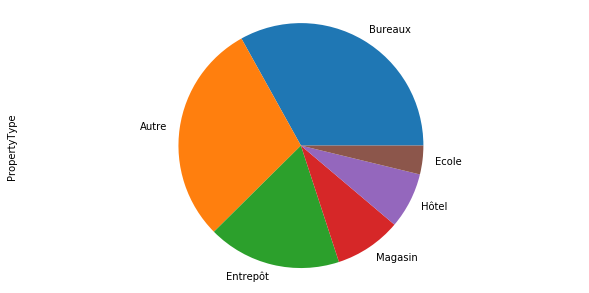

In [16]:
#On supprime nos 5 bâtiments destinés à l'habitation
data.drop(index = data[data["PropertyType"] == 'Inconnu'].index, inplace = True)

#On trace la pie chart des types de bâtiments
fig = plt.figure(figsize = (10,5))
data["PropertyType"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

Nous pouvons supprimer certaines colonnes devenues obsolètes, avant d'afficher l'état de notre base de données pour poursuivre son nettoyage.

In [17]:
#On supprime les colonnes obsolètes
data.drop(columns = ['BuildingType', 'LargestPropertyUseType','SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
                     'ListOfAllPropertyUseTypes', 'PrimaryPropertyType'], inplace = True)

#On affiche les colonnes restantes pour la suite du nettoyage
print(data.columns)
print(data.shape)
data.head()

Index(['ENERGYSTARScore', 'Electricity(kBtu)', 'Electricity(kWh)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'LargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'NaturalGas(therms)',
       'NumberofBuildings', 'NumberofFloors', 'OtherFuelUse(kBtu)',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'PropertyName', 'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)',
       'ThirdLargestPropertyUseTypeGFA', 'YearBuilt', 'PropertyType'],
      dtype='object')
(2954, 26)


,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NaturalGas(therms),NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,PropertyName,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,YearBuilt,PropertyType
0,65.0,3686160.0,1080307.0,249.43,2.64,88434.0,1272388.0,12724.0,1.0,12.0,0.0,88434,0,88434,MAYFLOWER PARK HOTEL,NaN,78.9,80.3,6981428.0,7097539.0,173.5,175.1,2023032.0,NaN,1927,Hôtel
6,99.0,6795266.0,1991496.0,312.59,1.16,244500.0,4993733.0,49937.0,1.0,6.0,0.0,179775,64725,244500,ALJOYA THORNTON PLACE,NaN,48.2,50.9,11788719.0,12438379.0,108.7,111.2,0.0,NaN,2009,Hôtel
9,98.0,94189.0,27604.0,0.66,0.01,22763.0,0.0,0.0,1.0,1.0,0.0,24617,0,24617,5055 Properties LLC,NaN,4.1,4.1,94186.0,94186.0,13.0,13.0,0.0,NaN,1932,Entrepôt
10,NaN,3293256.0,965158.0,22.96,0.07,84710.0,0.0,0.0,1.0,3.0,0.0,42355,84710,127065,The Innovation Center (MCKINSTRY),42355.0,77.8,83.5,3293119.0,3537439.0,244.1,262.2,0.0,NaN,2009,Autre
15,16.0,1830624.0,536503.0,47.42,1.56,23468.0,652551.0,6526.0,1.0,1.0,0.0,25384,0,25384,JG CROWN HILL LLC,NaN,105.8,113.4,2483099.0,2660614.0,274.1,278.6,0.0,NaN,1993,Magasin


## Préparation des variables à prédire

### Consommation d'énergie

L'un des objectifs du projet est d'estimer la consommation totale d'énergie. Il convient donc de savoir si l'une des variables permet d'englober la consommation d'électricité, de gaz naturel, de vapeur, etc. Heureusement les consommations de chacune de ces énergies sont données sous la même unité, à savoir le *kilo British thermal unit*. Nous allons pouvoir les comparer avec les relevés de consommation d'énergie sur Site dans la même unité.

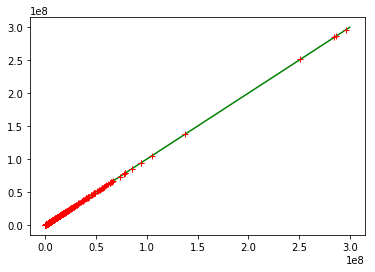

In [18]:
#On crée une variable "Consommation" temporaire, pour la comparer avec "SiteEnergyUse(kBtu)"
data['Consommation'] = data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'] + data['SteamUse(kBtu)'] \
        + data['OtherFuelUse(kBtu)']
#On trace la première bissectrice y=x, pour voir comment vont se placer nos points par rapport à cette droite
plt.plot([0,300000000], [0,300000000], 'g')
#On affiche le graphe d'une colonne par rapport à l'autre, pour voir si elles sont égales
plt.plot(data['SiteEnergyUse(kBtu)'].tolist(),
         data['Consommation'].tolist(), 'r+ ')
plt.show()

Nous allons pouvoir nous défausser des consommations individuelles en électricité, gaz naturel, etc... pour ne conserver que les consommations en énergie totale. Cependant nous avons aussi accès qu'à **l'intensité** de consommation d'énergie, ce qui correspond à la consommation annuelle divisée par la superficie de la propriété (*Gross Floor Area* ou GFA). Nous allons simplement vérifier quelle superficie est utilisée pour ce calcul, plus particulièrement si c'est la superficie totale, celle des bâtiments ou celles déclarées pour les différentes utilisations de la propriété. Si aucune de ces variables ne permet de retrouver exactement les valeurs d'intensité, nous calculerons les corrélations entre les superficies et les variables cibles pour conserver la superficie la plus pertinente.

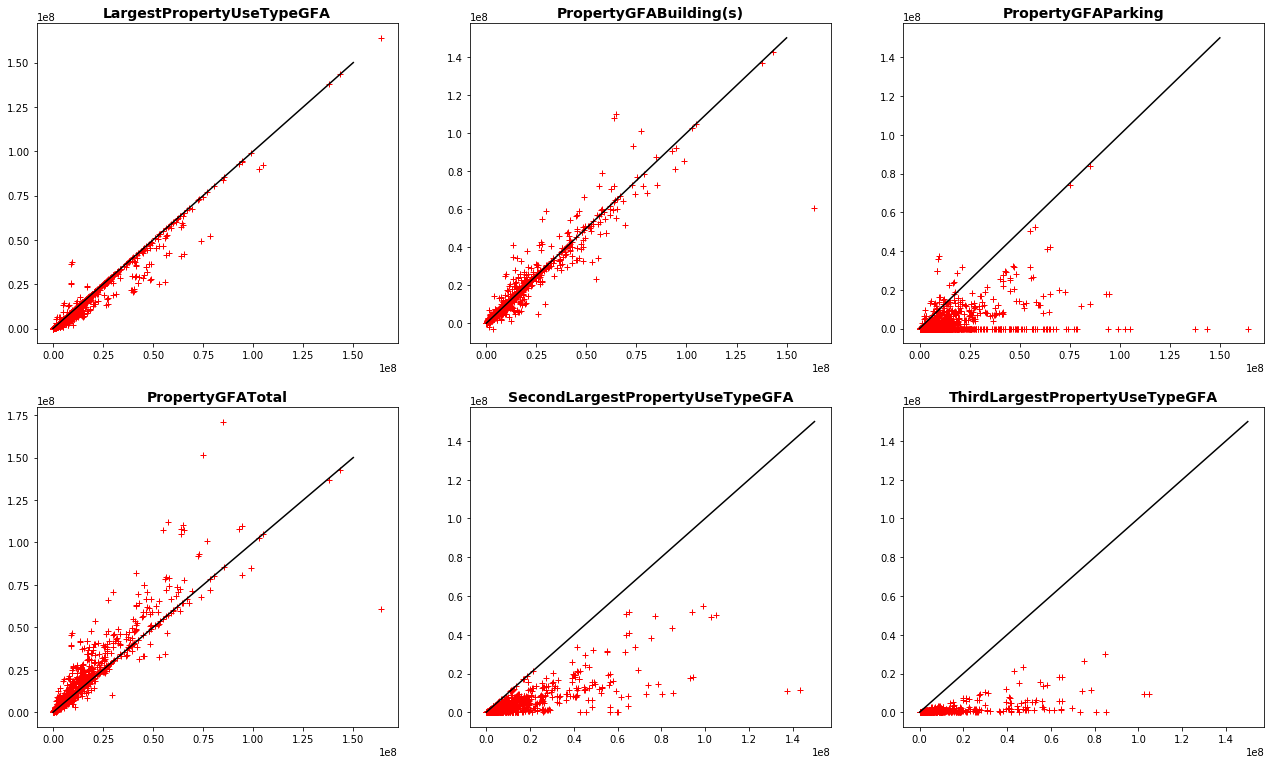

In [19]:
#Dans un soucis de lisibilité, nous allons ommettre quelques bâtiments ayant une grosse consommation d'énergie
compar = data[data['SiteEnergyUse(kBtu)'] < 200000000]

#On liste les différentes superficies disponibles
superficies = ['LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']

#On affiche les différents ratios
n = len(superficies)
fig = plt.figure(figsize=(22, 20))
for i in range(n): 
    #On compare la variable "SiteEnergyUse" avec le produit "SiteEnergyIntensity" par chaque variable de superficie
    ax = fig.add_subplot(n//3+1, 3, i+1)
    ax.plot(compar['SiteEnergyUse(kBtu)'].tolist(), compar['SiteEUI(kBtu/sf)']*compar[superficies[i]].tolist(), 'r+ ')
    ax.plot([0,150000000], [0,150000000], 'k')
    ax.set_title(superficies[i], fontsize=14, fontweight='bold')
plt.show()

In [20]:
#On construit la matrice de corrélation
correl = data[['SiteEnergyUse(kBtu)']+superficies].corr()
#On affiche la corrélation entre la variable 'SiteEnergyUse(kBtu)' et les superficies
print(correl['SiteEnergyUse(kBtu)'])

SiteEnergyUse(kBtu)                1.000000
LargestPropertyUseTypeGFA          0.694374
PropertyGFABuilding(s)             0.676568
PropertyGFAParking                 0.265706
PropertyGFATotal                   0.651026
SecondLargestPropertyUseTypeGFA    0.602589
ThirdLargestPropertyUseTypeGFA     0.522612
Name: SiteEnergyUse(kBtu), dtype: float64


Il paraît clair que c'est la superficie **de l'utilisation principale de la propriété** (*LargestPropertyUseTypeGFA*) qui est la plus pertinente pour étudier la consommation d'énergie. On peut brièvement refaire la même vérification avec l'intensité d'énergie consommée *normalisée en fonction de la météo* (*weather normalized* ou WN)

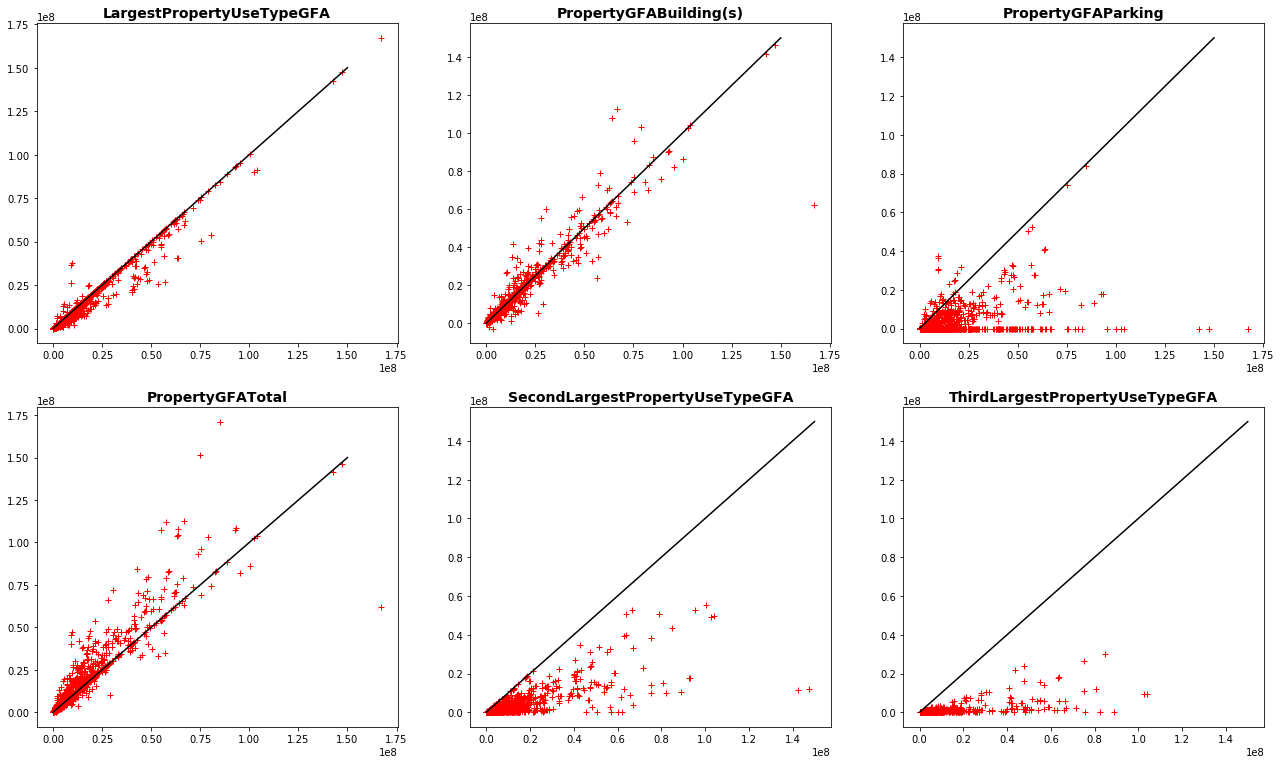

SiteEnergyUseWN(kBtu)              1.000000
LargestPropertyUseTypeGFA          0.684720
PropertyGFABuilding(s)             0.663807
PropertyGFAParking                 0.257438
PropertyGFATotal                   0.637952
SecondLargestPropertyUseTypeGFA    0.589173
ThirdLargestPropertyUseTypeGFA     0.467535
Name: SiteEnergyUseWN(kBtu), dtype: float64


In [21]:
#Dans un soucis de lisibilité, nous allons ommettre quelques bâtiments ayant une grosse consommation d'énergie
compar = data[data['SiteEnergyUseWN(kBtu)'] < 200000000]

#On liste les différentes superficies disponibles
superficies = ['LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']

#On affiche les différents ratios
n = len(superficies)
fig = plt.figure(figsize=(22, 20))
for i in range(n): 
    #On compare la variable "SiteEnergyUseWN" avec le produit "SiteEUIWN" par chaque variable de superficie
    ax = fig.add_subplot(n//3+1, 3, i+1)
    ax.plot(compar['SiteEnergyUseWN(kBtu)'].tolist(), compar['SiteEUIWN(kBtu/sf)']*compar[superficies[i]].tolist(), 'r+ ')
    ax.plot([0,150000000], [0,150000000], 'k')
    ax.set_title(superficies[i], fontsize=14, fontweight='bold')
plt.show()

#On construit la matrice de corrélation
correl = data[['SiteEnergyUseWN(kBtu)']+superficies].corr()
#On affiche la corrélation entre la variable 'SiteEnergyUseWN(kBtu)' et les superficies
print(correl['SiteEnergyUseWN(kBtu)'])

C'est bien la variable *LargestPropertyUseTypeGFA* qui va nous intéresser. Nous travaillerons néanmoins sur les données non normalisées.

### Emissions de gaz à effets de serre

Un autre aspect du projet est de prédire l'émission des gaz à effets de serre (*GreenHouse Gases* ou GHG). A nouveau nous disposons de l'émission totale mais aussi de l'**intensité** d'émission. Nous allons donc vérifier sur quelle superficie se base le calcul de cette intensité.

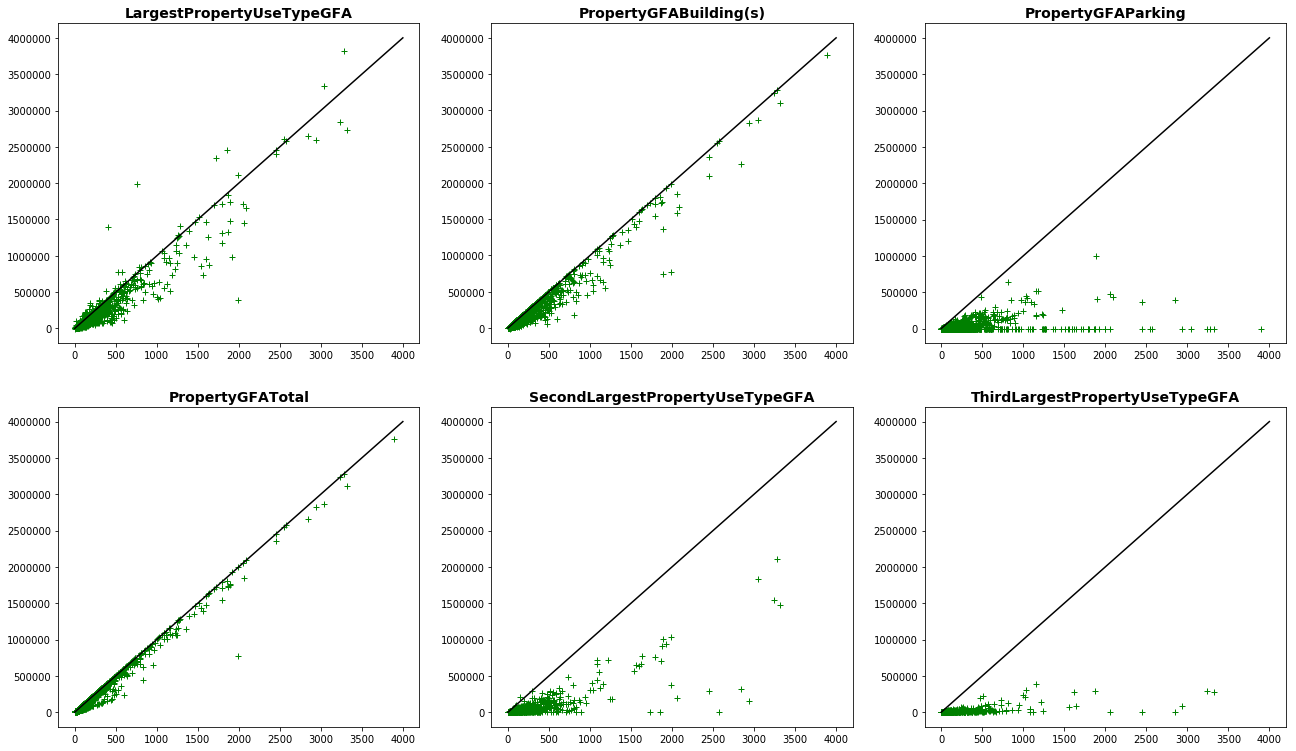

GHGEmissions(MetricTonsCO2e)       1.000000
LargestPropertyUseTypeGFA          0.560032
PropertyGFABuilding(s)             0.517269
PropertyGFAParking                 0.090450
PropertyGFATotal                   0.471466
SecondLargestPropertyUseTypeGFA    0.448233
ThirdLargestPropertyUseTypeGFA     0.293535
Name: GHGEmissions(MetricTonsCO2e), dtype: float64


In [22]:
#Dans un soucis de lisibilité, nous allons ommettre quelques bâtiments ayant une grosse émission de gaz
compar = data[data['GHGEmissions(MetricTonsCO2e)'] < 4000]

#On liste les différentes superficies disponibles
superficies = ['LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']

#On affiche les différents ratios
n = len(superficies)
fig = plt.figure(figsize=(22, 20))
for i in range(n): 
    #On compare la variable "GHGEmissions" avec le produit "GHGEmissionsIntensity" par chaque variable de superficie
    ax = fig.add_subplot(n//3+1, 3, i+1)
    ax.plot(compar['GHGEmissions(MetricTonsCO2e)'].tolist(),
            compar['GHGEmissionsIntensity(kgCO2e/ft2)']*compar[superficies[i]].tolist(), 'g+ ')
    #On prend en compte le facteur 1000 dû au changement d'unité (tonnes contre kg) en traçant notre droite de référence
    ax.plot([0,4000], [0,4000000], 'k')
    ax.set_title(superficies[i], fontsize=14, fontweight='bold')
plt.show()

#On construit la matrice de corrélation
correl = data[['GHGEmissions(MetricTonsCO2e)']+superficies].corr()
#On affiche la corrélation entre la variable 'GHGEmissions(MetricTonsCO2e)' et les superficies
print(correl['GHGEmissions(MetricTonsCO2e)'])

Pour l'émission des gaz à effet de serre il faudra également conserver la superficie *LargestPropertyUseTypeGFA* qui est la plus corrélée avec l'émission des gaz à effets de serre des bâtiments.

### Vérification des superficies

Les données nous fournissent la superficie (GFA) totale, du parking et des bâtiments. Nous allons néanmoins vérifier qu'il n'y a pas eu d'erreur et que ces 3 quantités vérifient la relation :
$$ \text{Superficie totale} = \text{Superficie bâtiments} + \text{Superficie parking.} $$

In [23]:
#On commence par identifier les bâtiments où les superficies ne s'additionnent pas bien
superficie_erronee = data.loc[data['PropertyGFATotal'] != data['PropertyGFABuilding(s)'] + data['PropertyGFAParking']]
#On liste les colonnes qui vont nous intéresser
colonnes = ['PropertyName', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']
#On affiche les données erronées
print(superficie_erronee[colonnes])

Empty DataFrame
Columns: [PropertyName, PropertyGFATotal, PropertyGFABuilding(s), PropertyGFAParking]
Index: []


Nous allons également vérifier qu'il n'y a pas eu d'erreurs, en particulier pour les deux superficies qui nous intéressent (à savoir "LargestPropertyUseTypeGFA" et "PropertyGFATotal") en s'assurant qu'elles sont positives. Nous supprimerons les entrées erronées.

In [24]:
#On commence par identifier les superficies négatives
superficie_erronee = data.loc[(data['PropertyGFATotal'] < 0) | (data['LargestPropertyUseTypeGFA'] < 0)]
#On liste les colonnes qui vont nous intéresser
colonnes = ['PropertyName', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA']
#On affiche les données erronées
print(superficie_erronee[colonnes])

Empty DataFrame
Columns: [PropertyName, PropertyGFATotal, LargestPropertyUseTypeGFA]
Index: []


### Suppression des variables superflues

Après ces courtes analyses, nous allons retirer certaines variables superflues pour notre étude. Pour cela nous allons regarder la corrélation entre les variables quantitatives et les variables à prédire, afin d'écarter celles qui sont directement corrélées.

In [25]:
#On liste les colonnes concernées
var_pred = ['GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)']
colonnes = ['Electricity(kBtu)', 'Electricity(kWh)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'LargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'NaturalGas(therms)',
       'NumberofBuildings', 'NumberofFloors', 'OtherFuelUse(kBtu)',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)',
       'ThirdLargestPropertyUseTypeGFA', 'YearBuilt']
#On construit la matrice de corrélation
correl = data[var_pred + colonnes].corr()
#On affiche la corrélation entre les variables à prédire et les autres
for var in var_pred:
    print(correl.sort_values(by=[var], ascending=False)[var])

GHGEmissions(MetricTonsCO2e)         1.000000
SiteEnergyUseWN(kBtu)                0.883819
SiteEnergyUse(kBtu)                  0.879425
SteamUse(kBtu)                       0.811695
Electricity(kWh)                     0.672138
Electricity(kBtu)                    0.672137
NaturalGas(kBtu)                     0.608502
NaturalGas(therms)                   0.608502
LargestPropertyUseTypeGFA            0.560032
PropertyGFABuilding(s)               0.517269
PropertyGFATotal                     0.471466
SecondLargestPropertyUseTypeGFA      0.448233
GHGEmissionsIntensity(kgCO2e/ft2)    0.391951
NumberofBuildings                    0.325483
SiteEUI(kBtu/sf)                     0.302735
SiteEUIWN(kBtu/sf)                   0.298507
ThirdLargestPropertyUseTypeGFA       0.293535
SourceEUI(kBtu/sf)                   0.247880
SourceEUIWN(kBtu/sf)                 0.243657
NumberofFloors                       0.190734
PropertyGFAParking                   0.090450
YearBuilt                         

Nous allons supprimer les colonnes qui nous ont temporairement servi pour l'étude, en plus de celles qui sont trop corrélées aux variables à prédire (car directement impliquées dans leur calcul) et des variables qui sont redondantes.

In [26]:
#On liste les colonnes à supprimer
suppression = ['PropertyName', 'Consommation', 'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
               'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'NaturalGas(therms)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
               'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'OtherFuelUse(kBtu)']
#On les supprime
data.drop(columns = suppression, inplace = True)
#On jette un oeil à l'état actuel de notre base de données
print(data.shape)
print(data.columns)
data.head()

(2954, 13)
Index(['ENERGYSTARScore', 'GHGEmissions(MetricTonsCO2e)',
       'LargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'SecondLargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)',
       'ThirdLargestPropertyUseTypeGFA', 'YearBuilt', 'PropertyType'],
      dtype='object')


,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),LargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),ThirdLargestPropertyUseTypeGFA,YearBuilt,PropertyType
0,65.0,249.43,88434.0,1.0,12.0,88434,0,88434,NaN,6981428.0,NaN,1927,Hôtel
6,99.0,312.59,244500.0,1.0,6.0,179775,64725,244500,NaN,11788719.0,NaN,2009,Hôtel
9,98.0,0.66,22763.0,1.0,1.0,24617,0,24617,NaN,94186.0,NaN,1932,Entrepôt
10,NaN,22.96,84710.0,1.0,3.0,42355,84710,127065,42355.0,3293119.0,NaN,2009,Autre
15,16.0,47.42,23468.0,1.0,1.0,25384,0,25384,NaN,2483099.0,NaN,1993,Magasin


## Analyse et transformation des variables

## Préparation pour les modèles prédictifs

### Transformation des variables à prédire

Nous allons regarder quels bâtiments ont une émission de gaz et/ou une consommation d'énergie négative ou nulle. Dans le premier cas il s'agira d'une erreur, dans le second cela pourrait fausser la transformation de nos variables (par exemple lors d'un passage au log)

In [27]:
erreurs = data[(data['GHGEmissions(MetricTonsCO2e)'] <= 0) | (data['SiteEnergyUse(kBtu)'] <= 0)]
print(erreurs[['ENERGYSTARScore', 'GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)']])

      ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  SiteEnergyUse(kBtu)
1624              NaN                           0.0         0.000000e+00
2088              NaN                           0.0         0.000000e+00
4330            100.0                          -0.8         3.427261e+05
5026             31.0                           0.0         1.252517e+07
5090              NaN                           0.0         0.000000e+00
5647              NaN                           0.0         0.000000e+00


Nous pouvons supprimer ces quelques entrées sans que ça n'ait un impact néfaste sur notre étude. Nous allons désormais transformer les variables à prédire qui ont une asymétrie positive afin de se rapprocher de la répartition d'une loi normale.

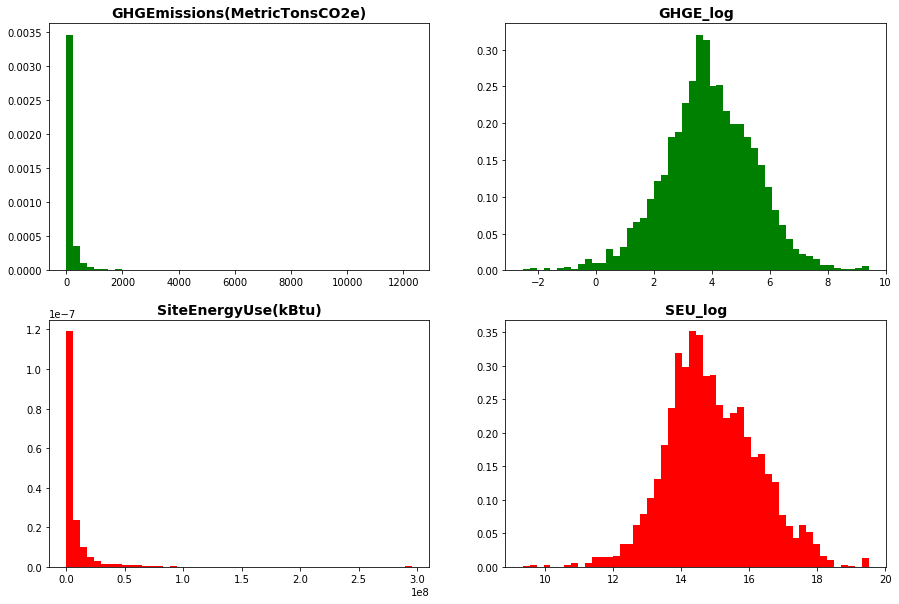

In [28]:
#On supprime les erreurs sus-citées
data = data.drop(index = erreurs.index)

#On empêche un avertissement de s'afficher, il n'est pas nécessaire pour l'étude
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

#On crée de nouvelles colonnes contenant les variables transformées
data['GHGE_log'] = data['GHGEmissions(MetricTonsCO2e)'].apply(lambda x: np.log(x))
data['SEU_log'] = data['SiteEnergyUse(kBtu)'].apply(lambda x: np.log(x))

#On liste nos nouvelles variables
var_transfo = ['GHGE_log', 'SEU_log']
anciennes_var = ['GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)']

#On construit l'ensemble des types de bâtiments
ens_types = set(data['PropertyType'].unique())

#On affiche la répartition des variables avant et après transformation
n = len(var_transfo)
fig = plt.figure(figsize=(15, 10))
colors = ['green', 'red']
for i in range(n): 
    #Ensuite on affiche la densité sous forme de histplot
    ax = fig.add_subplot(n, 2, (2*i+1))
    ax.hist(data[anciennes_var[i]].dropna(),
            bins=50, color=colors[i], density=True, edgecolor='none')
    ax.set_title(anciennes_var[i], fontsize=14, fontweight='bold')
    
    #Ensuite on affiche la densité sous forme de histplot
    ax = fig.add_subplot(n, 2, (2*i+2))
    ax.hist(data[var_transfo[i]].dropna(),
            bins=50, color=colors[i], density=True, edgecolor='none')
    ax.set_title(var_transfo[i], fontsize=14, fontweight='bold')
    

plt.show()

#On supprime les variables devenues obsolètes
data.drop(columns = anciennes_var, inplace = True)

### Transformation de la variable *PropertyType*

La variable *PropertyType* est une variable qualitative qui sera trés importante pour nos prédictions. Cependant nous comptons utiliser entre autres des modèles de régression qui ne manipulent que des variables **qualitatives**. Nous allons donc créer une série de variables qui indiqueront à l'aide d'une valeur dans $\lbrace 0,1\rbrace$ si le bâtiment appartient ou non à un type spécifique.

In [29]:
#On code une fonction remplaçant les variables qualitatives par les indicatrices de ses modalités
def indicatrices_variables_qualitative(data):
    liste_variables = data.columns
    result = data.copy()
    for variable in liste_variables:
        liste_modalites = data[variable].unique()
        for modalite in liste_modalites:
            result[modalite] = data[variable].apply(lambda x: indicatrice(modalite,x))
    return result.drop(columns=liste_variables)

#en utilisant la sous-fonction indicatrice
def indicatrice(groupe, donnee):
    if donnee == groupe:
        return 1
    else:
        return 0

#On applicque la fonction indicatrices_variables_qualitative à PropertyType
data = pd.concat([data, indicatrices_variables_qualitative(data[['PropertyType']])], axis=1)
data.head()

,ENERGYSTARScore,LargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,YearBuilt,PropertyType,GHGE_log,SEU_log,Hôtel,Entrepôt,Autre,Magasin,Bureaux,Ecole
0,65.0,88434.0,1.0,12.0,88434,0,88434,NaN,NaN,1927,Hôtel,5.519178,15.758764,1,0,0,0,0,0
6,99.0,244500.0,1.0,6.0,179775,64725,244500,NaN,NaN,2009,Hôtel,5.744892,16.282654,1,0,0,0,0,0
9,98.0,22763.0,1.0,1.0,24617,0,24617,NaN,NaN,1932,Entrepôt,-0.415515,11.453027,0,1,0,0,0,0
10,NaN,84710.0,1.0,3.0,42355,84710,127065,42355.0,NaN,2009,Autre,3.133754,15.007346,0,0,1,0,0,0
15,16.0,23468.0,1.0,1.0,25384,0,25384,NaN,NaN,1993,Magasin,3.859044,14.725018,0,0,0,1,0,0


### Conversion de la date de construction

On va tranformer la variable *YearBuilt* en une variable donnant l'âge actuel du bâtiment.

In [30]:
#Année actuelle
today = 2022
#Transformation de la variable
data['Age'] = today - data['YearBuilt']
#Suppression de la variable devenue obsolète
data.drop(columns = ['YearBuilt'], inplace = True)

## Analyses des variables quantitatives

### Analyses univariées

Nous allons observer la répartition des différentes variables quantitatives.

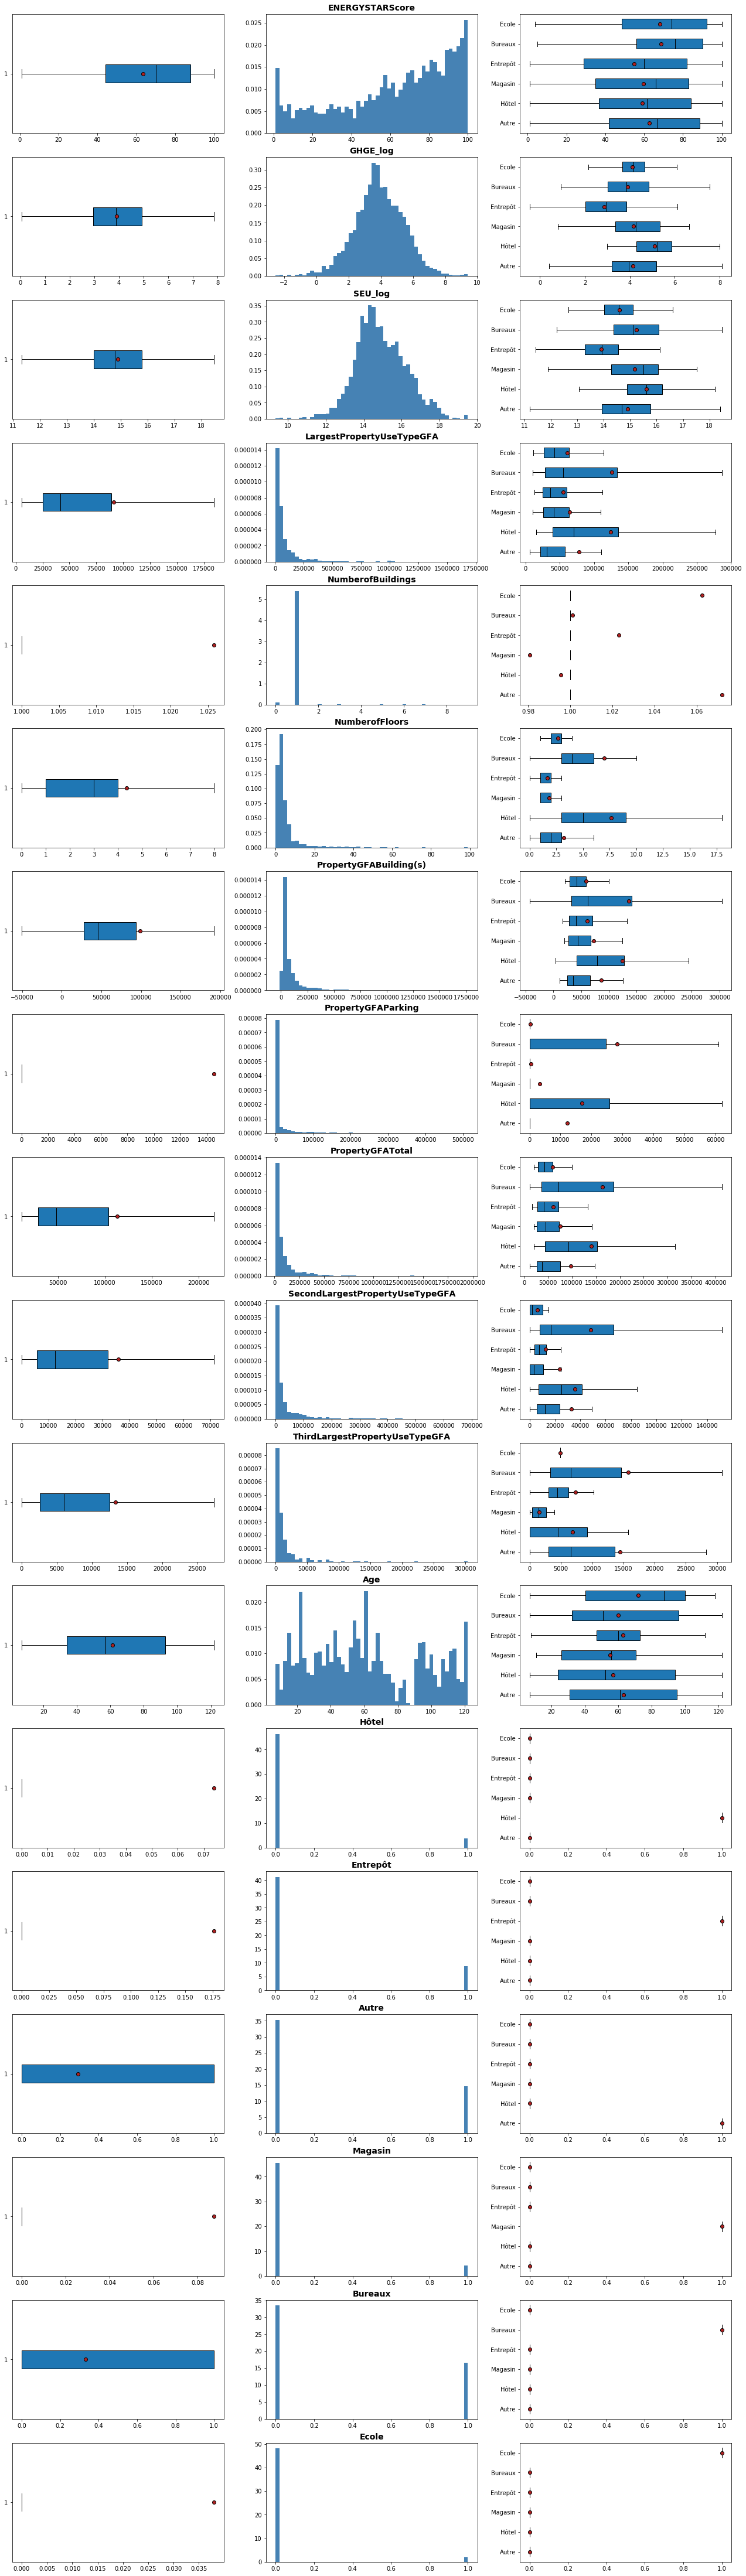

In [31]:
#On va lister les variables quantitatives de notre base de données
quanti = ['ENERGYSTARScore', 'GHGE_log', 'SEU_log', 'LargestPropertyUseTypeGFA', 'NumberofBuildings',
          'NumberofFloors', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
          'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
          'Age', 'Hôtel', 'Entrepôt', 'Autre', 'Magasin', 'Bureaux', 'Ecole']

#On va afficher la répartition de chaque variable quantitative
n = len(quanti) 
fig = plt.figure(figsize=(22, 80))
for i in range(n):
    #On commence par un boxplot pour comprendre la plage de valeurs
    ax = fig.add_subplot(n, 3, (3*i+1))
    ax.boxplot(data[quanti[i]].dropna(), showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    
    #Ensuite on affiche la densité sous forme de histplot
    ax = fig.add_subplot(n, 3, (3*i+2))
    ax.hist(data[quanti[i]].dropna(), bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(quanti[i], fontsize=14, fontweight='bold')
    
    #Enfin on affiche les boxplots selon les différents types de bâtiment
    ax = fig.add_subplot(n, 3, (3*i+3))
    donnees = []
    for l in ens_types:
        donnees.append(data[data['PropertyType']==l][quanti[i]].dropna().tolist())
    ax.boxplot(donnees, labels=ens_types, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show() 

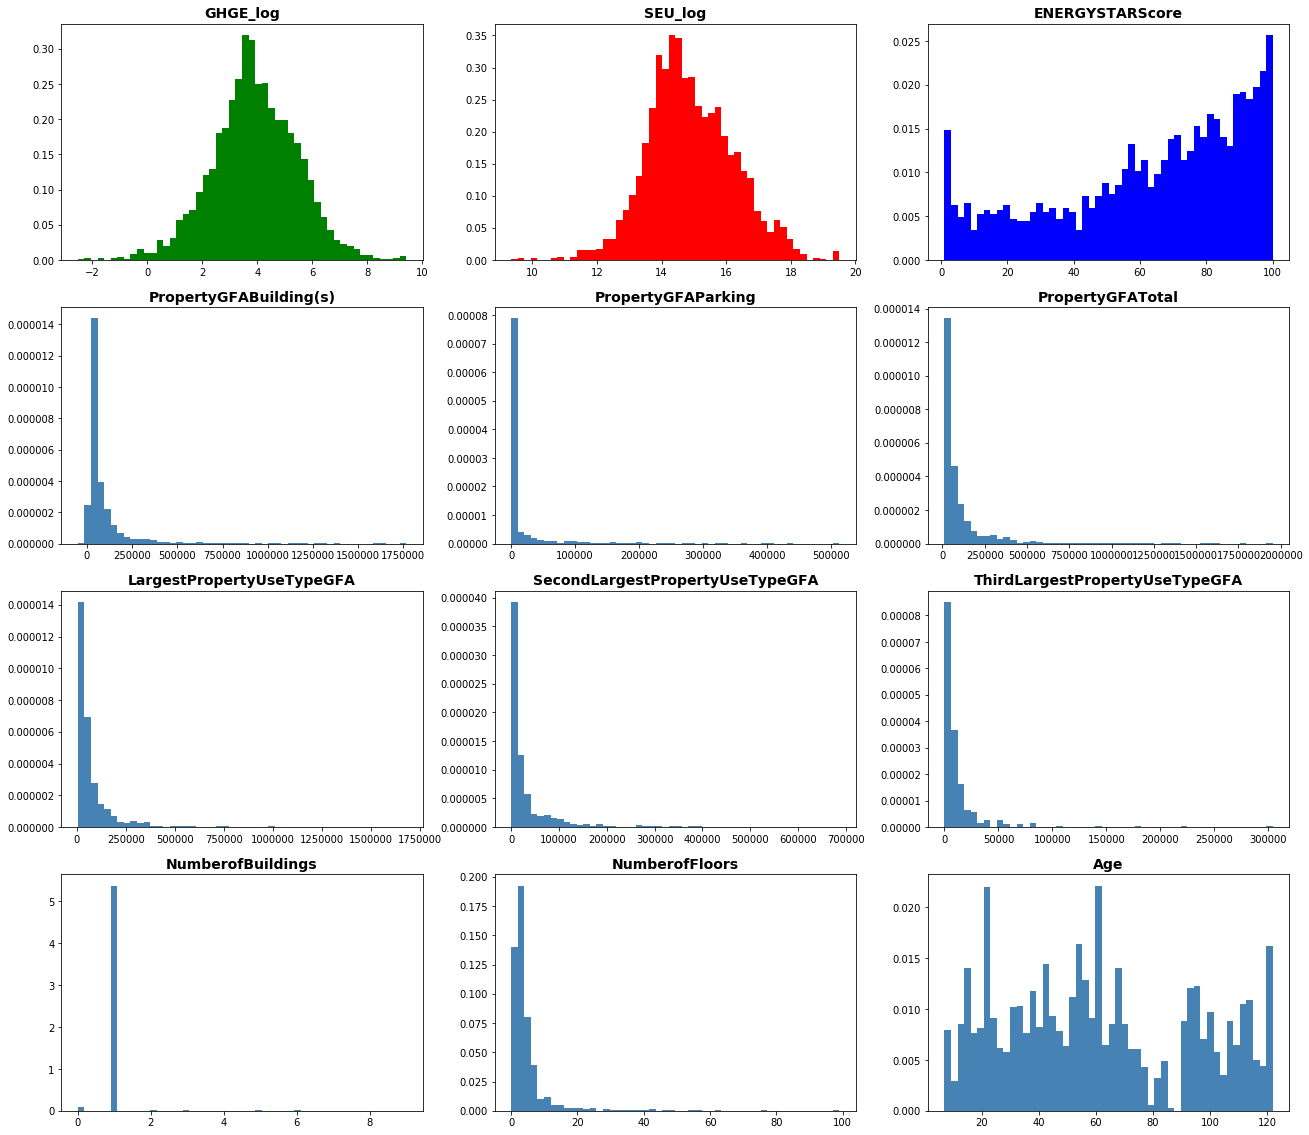

In [32]:
#On peut regarder plus en détail certaines répartitions
specifique = ['GHGE_log', 'SEU_log', 'ENERGYSTARScore', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
          'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
          'NumberofBuildings', 'NumberofFloors', 'Age']
colors = ['green', 'red', 'blue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue',
         'steelblue', 'steelblue', 'steelblue']
n = len(specifique) 
fig = plt.figure(figsize=(22, 20))
for i in range(n):
    ax = fig.add_subplot(n//3, 3, i+1)
    ax.hist(data[specifique[i]].dropna(), bins=50, color=colors[i], density=True, edgecolor='none')
    ax.set_title(specifique[i], fontsize=14, fontweight='bold')
plt.show() 

### Analyses bivariées

Nous allons à présent construire la matrice de corrélation de nos variables quantitatives, afin de comprendre leurs relations deux à deux. Nous la visualiserons mieux via une heatmap.

                                 ENERGYSTARScore  GHGE_log   SEU_log  \
ENERGYSTARScore                         1.000000 -0.165743 -0.162387   
GHGE_log                               -0.165743  1.000000  0.896172   
SEU_log                                -0.162387  0.896172  1.000000   
LargestPropertyUseTypeGFA               0.127795  0.478317  0.590888   
NumberofBuildings                      -0.037085  0.104722  0.109175   
NumberofFloors                          0.139021  0.313616  0.428740   
PropertyGFABuilding(s)                  0.128341  0.477465  0.591503   
PropertyGFAParking                      0.122748  0.268035  0.395472   
PropertyGFATotal                        0.138898  0.477587  0.606553   
SecondLargestPropertyUseTypeGFA         0.186381  0.474512  0.592508   
ThirdLargestPropertyUseTypeGFA          0.131062  0.338379  0.422047   
Age                                     0.059080 -0.185034 -0.284218   
Hôtel                                  -0.051058  0.221870  0.14

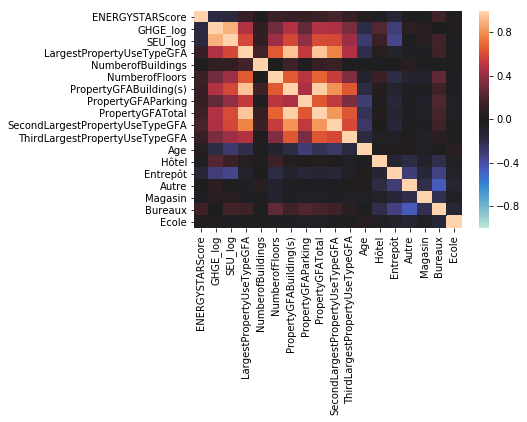

In [33]:
#On construit la matrice de corrélation
correl = data[quanti].corr()
print(correl)
#Nous utiliserons la heatmap de seaborn en complément des valeurs numériques
import seaborn as sns
#On affiche la heatmap pour rendre les corrélations évidentes plus visibles
sns.heatmap(correl, center=0, vmin=-1, vmax=1, xticklabels=quanti, yticklabels=quanti)

Il y a 3 variables qui semblent fortement corrélées : *LargestPropertyUseTypeGFA*, *PropertyGFABuilding(s)* et *PropertyGFATotal*. Il ne faut en garder qu'une des 3, la plus corrélée aux variables cibles à savoir *LargestPropertyUseTypeGFA*.

In [34]:
data = data.drop(columns=['PropertyGFABuilding(s)', 'PropertyGFATotal'])

### Analyse multivariée

Nous allons chercher à expliciter davantage les corrélations entre les variables à l'aide d'une ACP.

In [35]:
#Nous aurons besoin d'importer les ressources suivantes
from sklearn import decomposition
from sklearn import preprocessing

#Les fonctions définies ci-après sont directement issues d'un cours d'OpenClassroom 
#et nous permettront de mieux visualiser les résultats de l'ACP
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, importantes_var=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        if labels[i] in importantes_var:
                            plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="red", alpha=0.5)
                        else:
                            plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca, n):
    scree = pca.explained_variance_ratio_*100
    plt.plot([0.5,n+0.5], [100/n, 100/n], 'g-')
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

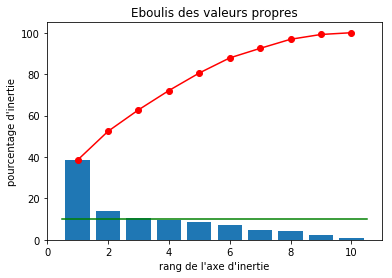

In [36]:
#Listons les variables à utiliser pour l'ACP, à savoir les variables quantitatives (hormis les types de bâtiments)
colonnes = ['ENERGYSTARScore', 'GHGE_log', 'SEU_log', 'LargestPropertyUseTypeGFA', 'NumberofBuildings',
          'NumberofFloors', 'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'Age']

#Nous avons n variables quantitatives, nous pouvons donc avoir jusqu'à n axes pertinents pour l'ACP
n_comp = len(colonnes)

#On restreint notre database aux colonnes quantitatives
data_pca = data[colonnes]

#On prépare les données pour l'ACP
data_pca = data_pca.fillna(data_pca.median()) # Il est fréquent de remplacer les valeurs inconnues par la mediane de la variable
X = data_pca.values
features = data_pca.columns

#Centrage et Réduction de nos données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

#On affiche l'éboulis des valeurs propres
display_scree_plot(pca, n_comp)

Si on applique le critère de Kaiser, on voit qu'on ne s'intéressera qu'aux 2 premières valeurs propres de l'ACP, les autres n'étant pas assez significative (pourcentage d'inertie < 1/nombre de composantes). Nous allons donc afficher le premier cercle des corrélations (qui concerne les deux premières valeurs propres) en mettant en valeurs les deux variables à prédire.

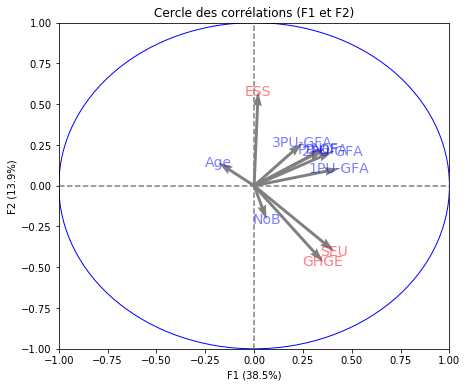

In [37]:
#Cercle des corrélations pour les 2 premières variables principales (critère de Kaiser)
pcs = pca.components_
#Nous allons utiliser des noms plus lisibles
noms = ['ESS', 'GHGE', 'SEU', '1PU-GFA', 'NoB',
          'NoF', 'PP-GFA', '2PU-GFA', '3PU-GFA', 'Age']
display_circles(pcs, n_comp, pca, [(0,1)], labels = noms, importantes_var=['ESS', 'GHGE', 'SEU'])

### Gestion des outliers

Certaines valeurs sont trop atypiques et risque d'altérer nos analyses. Nous allons donc considérer combien de ces données sortent de l'intervalle

$$\Big[Q1- 1.5*IQR, Q3 + 1.5*IQR\Big]$$

où $Q1$ et $Q3$ désignent respectivement le 1er et le 3ème quartile tandis que $IQR$ est l'intervalle inter-quartiles $Q3-Q1$.

In [38]:
#On crée une fonction qui remplace les données hors de l'intervalle considéré dans les colonnes listées en paramètre
def comptage_outliers_IQR(data, colonnes):
    quartiles = data[colonnes].quantile(q = [.25,.75], axis = 'rows')
    bords = pd.DataFrame(index = ['IQR', 'minimum', 'maximum'], columns = colonnes)
    bords.loc['IQR'] = 1.5*(quartiles.loc[0.75]-quartiles.loc[0.25])
    bords.loc['minimum'] = quartiles.loc[0.25] - bords.loc['IQR']
    bords.loc['maximum'] = quartiles.loc[0.75] + bords.loc['IQR']
    for c in colonnes:
        data[c] = data[c].where(data[c] <= bords.loc['maximum'][c], other = bords.loc['maximum'][c])
        data[c] = data[c].where(data[c] >= bords.loc['minimum'][c], other = bords.loc['minimum'][c])
    return(data)

#Nous allons d'abord calculer les quartiles
quartiles = data[colonnes].quantile(q = [.25,.75], axis = 'rows')
#Nous allons lister les bornes inférieure et supérieure de l'intervalle, en conservant 1.5*IQR comme variable intermédiaire
bords = pd.DataFrame(index = ['IQR', 'minimum', 'maximum'], columns = colonnes)
bords.loc['IQR'] = 1.5*(quartiles.loc[0.75]-quartiles.loc[0.25])
bords.loc['minimum'] = quartiles.loc[0.25] - bords.loc['IQR']
bords.loc['maximum'] = quartiles.loc[0.75] + bords.loc['IQR']

#On compte combien d'entrées sortent de l'intervalle
outliers = data.where((data[colonnes] > bords.loc['maximum']) | (data[colonnes] < bords.loc['minimum']))\
    .dropna(axis = 'index', how = 'all')[colonnes]
#On affiche le nombre total d'entrées, ainsi que le nombre d'outliers au total et individuellement pour chaque variable
print(data.shape[0])
print(outliers.shape[0])
print(outliers.count())

2948
986
ENERGYSTARScore                      0
GHGE_log                            49
SEU_log                             23
LargestPropertyUseTypeGFA          292
NumberofBuildings                   96
NumberofFloors                     267
PropertyGFAParking                 657
SecondLargestPropertyUseTypeGFA    219
ThirdLargestPropertyUseTypeGFA      64
Age                                  0
dtype: int64


Il y a beaucoup de données qui semblent atypiques, mais celles qui seraient le plus problématiques sont celles dans les variables à prédire. Nous allons supprimer les entrées correspondantes.

In [39]:
#On recherche les outliers, mais cette fois-ci uniquement sur les variables pertinentes
cibles = ['GHGE_log', 'SEU_log']
outliers = data.where((data[cibles] > bords.loc['maximum']) | (data[cibles] < bords.loc['minimum']))\
    .dropna(axis = 'index', how = 'all')

#Nous allons vérifier que la répartition des types de bâtiments ne soit pas trop affectée par cette suppression
print(data['PropertyType'].value_counts())
#On stocke temporairement la version sans outliers de notre database...
temp = data.drop(index = outliers.index)
#...afin de la comparer à l'originale
print(temp['PropertyType'].value_counts())

Bureaux     975
Autre       865
Entrepôt    520
Magasin     258
Hôtel       218
Ecole       112
Name: PropertyType, dtype: int64
Bureaux     970
Autre       840
Entrepôt    502
Magasin     258
Hôtel       216
Ecole       111
Name: PropertyType, dtype: int64


In [40]:
#Tous les types restent bien représentés, on peut remplacer data par temp
data = temp

## Séparation des données

Nous allons séparer la base de données en un jeu d'entraînement (sur lequel nous ferons travailler nos modèles) et un jeu de test (qui nous servirons à évaluer leurs performances pour les comparer). Il faut cependant faire attention à ce que tous les types de bâtiments soient correctement répartis entre les deux jeux de données.

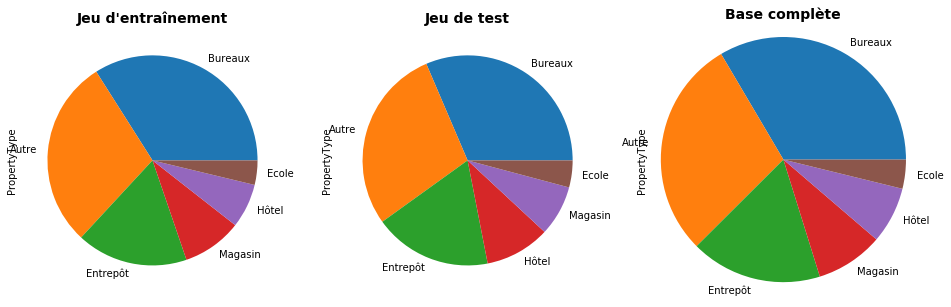

In [41]:
#On se fixe la proportion de la base de données qui sera isolée pour les évaluations finales
proportion = 0.2
#On génère un échantillon aléatoire de nos entrées suivant cette proportion
import random as rd
test_index = rd.sample(data.index.tolist(), int(proportion*data.shape[0]))
#On sépare alors nos données en deux jeux distincts
data_test = data.loc[test_index]
data_train = data.drop(index = test_index)

#On vérifie la répartition des groupes dans nos jeux de données
fig = plt.figure(figsize = (16,5))

ax = fig.add_subplot(131)
data_train["PropertyType"].value_counts(normalize=True).plot(kind='pie')
ax.set_title("Jeu d'entraînement", fontsize=14, fontweight='bold')

ax = fig.add_subplot(132)
data_test["PropertyType"].value_counts(normalize=True).plot(kind='pie')
ax.set_title('Jeu de test', fontsize=14, fontweight='bold')

ax = fig.add_subplot(133)
data["PropertyType"].value_counts(normalize=True).plot(kind='pie')
ax.set_title('Base complète', fontsize=14, fontweight='bold')

# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

### Imputation des variables

Nous allons imputer certaines données quantitatives manquantes dans le jeu d'entraînement par la médiane **dans le type de bâtiment** correspondant, mais d'autres (comme *SecondlargestPropertyUseTypeGFA* par exemple) devront être remplacées par 0.

In [42]:
#On liste les variables à imputer par la médiane et celles à imputer par 0
cols_mediane = ['ENERGYSTARScore', 'LargestPropertyUseTypeGFA', 'NumberofBuildings',
          'NumberofFloors', 'PropertyGFAParking', 'Age']
cols_zero = ['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
#On affiche le remplissage des colonnes, afin de voir combien de données sont manquantes
print(data_train.count())
#On impute les valeurs médianes pour chaque catégorie dans les cases vides
data_train[cols_mediane] = data_train.groupby('PropertyType')[cols_mediane].transform(lambda x: x.fillna(x.median()))
#On impute 0 dans les colonnes concernées
data_train[cols_zero] = data_train[cols_zero].fillna(0)
#On affiche le remplissage des colonnes après imputation
print(data_train.count())

ENERGYSTARScore                    1537
LargestPropertyUseTypeGFA          2269
NumberofBuildings                  2316
NumberofFloors                     2311
PropertyGFAParking                 2318
SecondLargestPropertyUseTypeGFA    1252
ThirdLargestPropertyUseTypeGFA      520
PropertyType                       2318
GHGE_log                           2315
SEU_log                            2315
Hôtel                              2318
Entrepôt                           2318
Autre                              2318
Magasin                            2318
Bureaux                            2318
Ecole                              2318
Age                                2318
dtype: int64
ENERGYSTARScore                    2318
LargestPropertyUseTypeGFA          2318
NumberofBuildings                  2318
NumberofFloors                     2318
PropertyGFAParking                 2318
SecondLargestPropertyUseTypeGFA    2318
ThirdLargestPropertyUseTypeGFA     2318
PropertyType               

On n'oublie pas d'imputer le jeu de test avec les mêmes valeurs de remplacement, que ce soit 0 ou la médiane du jeu d'entraînement pour le type de bâtiment idoine.

In [43]:
#On affiche le remplissage des colonnes, afin de voir combien de données sont manquantes
print(data_test.count())
#On impute les valeurs médianes du jeu d'entraînement pour chaque type de bâtiment
for t in ens_types:
    #On liste les valeurs des médianes selon les colonnes dans un dictionnaire
    fill_dict = {x: data_train[data_train['PropertyType'] == t][x].median() for x in cols_mediane}
    data_test.loc[data_test['PropertyType'] == t] = data_test.loc[data_test['PropertyType'] == t].fillna(fill_dict)
#On n'oublie pas les colonnes qui doivent être imputées par 0
data_test[cols_zero] = data_test[cols_zero].fillna(0)
#On affiche le remplissage des colonnes après imputation
print(data_test.count())

ENERGYSTARScore                    379
LargestPropertyUseTypeGFA          567
NumberofBuildings                  579
NumberofFloors                     579
PropertyGFAParking                 579
SecondLargestPropertyUseTypeGFA    299
ThirdLargestPropertyUseTypeGFA     122
PropertyType                       579
GHGE_log                           579
SEU_log                            579
Hôtel                              579
Entrepôt                           579
Autre                              579
Magasin                            579
Bureaux                            579
Ecole                              579
Age                                579
dtype: int64
ENERGYSTARScore                    579
LargestPropertyUseTypeGFA          579
NumberofBuildings                  579
NumberofFloors                     579
PropertyGFAParking                 579
SecondLargestPropertyUseTypeGFA    579
ThirdLargestPropertyUseTypeGFA     579
PropertyType                       579
GHGE_log    

En ce qui concerne les variables cibles, il faudra bien évidemment supprimer les données n'ayant pas la valeur fournie. Cela nous force à séparer notre jeu de données en deux selon la variable à prédire. Nous profiterons de cette opération pour supprimer la variable *PropertyType* dont nous n'aurons plus l'utilité.

In [44]:
#On clone les jeux de données en droppant l'autre variable cible (et PropertyType dont nous n'aurons plus besoin)
data_train_ghg = data_train.drop(columns=['SEU_log', 'PropertyType'])
data_train_nrj = data_train.drop(columns=['GHGE_log', 'PropertyType'])
data_test_ghg = data_test.drop(columns=['SEU_log', 'PropertyType'])
data_test_nrj = data_test.drop(columns=['GHGE_log', 'PropertyType'])

#On supprime les entrées qui n'ont pas la variable cible de renseignée
data_train_ghg = data_train_ghg.dropna(subset=['GHGE_log'])
data_train_nrj = data_train_nrj.dropna(subset=['SEU_log'])
data_test_ghg = data_test_ghg.dropna(subset=['GHGE_log'])
data_test_nrj = data_test_nrj.dropna(subset=['SEU_log'])

### Standardisation des variables quantitatives

Nous allons centrer et réduire nos variables quantitatives, en nous basant sur les valeurs du jeu d'entraînement. Pour cela nous allons utiliser la fonction *centrage_reduction*.

In [45]:
#On code une fonction pour centrer et réduire les variables
def centrage_reduction(X_train, X_test = pd.DataFrame()):
    n = X_train.shape[0]
    mean = X_train.mean()
    deviation = np.sqrt(((X_train-mean)**2).sum()/n)
    X_train_std = (X_train-mean)/deviation
    if X_test.empty:
        X_test_std = X_test
    else:
        X_test_std = (X_test-mean)/deviation
    return (X_train_std, X_test_std)

#On empêche un avertissement de s'afficher, il n'est pas nécessaire pour l'étude
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

#On applique la fonction pour standardiser les variables quantitatives
(data_train_ghg, data_test_ghg) = centrage_reduction(data_train_ghg, data_test_ghg)
(data_train_nrj, data_test_nrj) = centrage_reduction(data_train_nrj, data_test_nrj)

### Sauvegarde des jeux de données

Nous pouvons à présent nos deux jeux de données pour les manipuler ultérieurement avec nos différents modèles prédictifs

In [46]:
#On sauvegarde les database au format .csv
data_train_ghg.to_csv(path_or_buf='database_train_ghg.csv', index = False)
data_test_ghg.to_csv(path_or_buf='database_test_ghg.csv', index = False)
data_train_nrj.to_csv(path_or_buf='database_train_nrj.csv', index = False)
data_test_nrj.to_csv(path_or_buf='database_test_nrj.csv', index = False)
#On affiche leurs tailles finales
print(data_train_ghg.shape)
print(data_test_ghg.shape)
print(data_train_nrj.shape)
print(data_test_nrj.shape)

(2315, 15)
(579, 15)
(2315, 15)
(579, 15)
